In [69]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [237]:
blas_f32 = pd.read_csv('grid_search_laplace_blas_f32_m1.csv')
blas_f64 = pd.read_csv('grid_search_laplace_blas_f64_m1.csv')
fft_f32 = pd.read_csv('grid_search_laplace_fft_f32_m1.csv')
fft_f64 = pd.read_csv('grid_search_laplace_fft_f64_m1.csv')

# Filter for random SVD
blas_f32 = blas_f32[blas_f32['n_oversamples'] > 0]
blas_f64 = blas_f64[blas_f64['n_oversamples'] > 0]
# fft_f32 = fft_f32[fft_f32['block_size'] == 128]
# fft_f64 = fft_f64[fft_f64['block_size'] == 128]

In [238]:
def min_digits(df, n, feature='mean_rel_err'):
    upper_bound = 10**-n
    lower_bound = 10**(-n-1)
    return df[(lower_bound <= df[feature]) & (df[feature] <= upper_bound)]

In [239]:
def fastest(df, feature='runtime'):
    min_index = df[feature].idxmin()
    return df.loc[min_index]

# Fastest settings for given accuracy

## Single precision

In [240]:
three_digits_blas_f32 = min_digits(blas_f32, 3)
four_digits_blas_f32 = min_digits(blas_f32, 4)
five_digits_blas_f32 = min_digits(blas_f32, 5)

three_digits_fft_f32 = min_digits(fft_f32, 3)
four_digits_fft_f32 = min_digits(fft_f32, 4)
five_digits_fft_f32 = min_digits(fft_f32, 5)

best_blas_f32 = [fastest(three_digits_blas_f32), fastest(four_digits_blas_f32), fastest(five_digits_blas_f32)]
best_fft_f32 = [fastest(three_digits_fft_f32), fastest(four_digits_fft_f32), fastest(five_digits_fft_f32)]

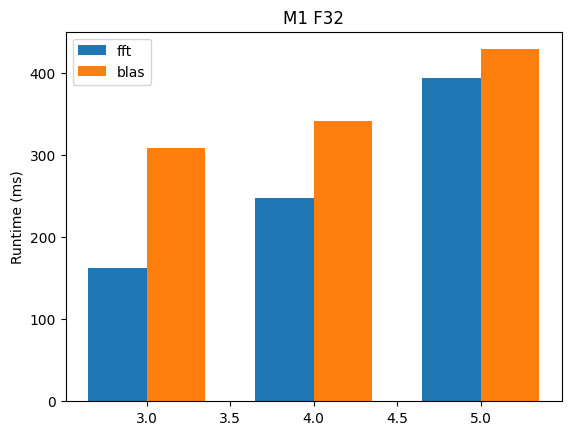

In [241]:
fig, ax = plt.subplots()

digits = np.array([3, 4, 5])

ax.set_title('M1 F32')
ax.set_ylabel('Runtime (ms)')

bar_width = 0.35  # width of bars

ax.bar(digits-bar_width/2, [df['runtime'] for df in best_fft_f32], bar_width, label='fft')
ax.bar(digits+bar_width/2, [df['runtime'] for df in best_blas_f32], bar_width, label='blas')

ax.legend()

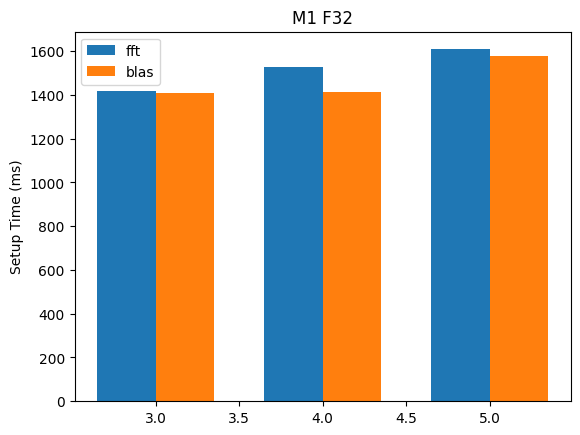

In [242]:
fig, ax = plt.subplots()

digits = np.array([3, 4, 5])

ax.set_title('M1 F32')
ax.set_ylabel('Setup Time (ms)')

bar_width = 0.35  # width of bars

ax.bar(digits-bar_width/2, [df['setup_time'] for df in best_fft_f32], bar_width, label='fft')
ax.bar(digits+bar_width/2, [df['setup_time'] for df in best_blas_f32], bar_width, label='blas')

ax.legend()

## Double Precision

In [243]:
six_digits_blas_f64 = min_digits(blas_f64, 6)
seven_digits_blas_f64 = min_digits(blas_f64, 7)
eight_digits_blas_f64 = min_digits(blas_f64, 8)
nine_digits_blas_f64 = min_digits(blas_f64, 9)
ten_digits_blas_f64 = min_digits(blas_f64, 10)
eleven_digits_blas_f64 = min_digits(blas_f64, 11)

six_digits_fft_f64 = min_digits(fft_f64, 6)
seven_digits_fft_f64 = min_digits(fft_f64, 7)
eight_digits_fft_f64 = min_digits(fft_f64, 8)
nine_digits_fft_f64 = min_digits(fft_f64, 9)
ten_digits_fft_f64 = min_digits(fft_f64, 10)
# eleven_digits_fft_f64 = min_digits(fft_f64, 11)


best_blas_f64 = [fastest(six_digits_blas_f64), fastest(seven_digits_blas_f64), fastest(eight_digits_blas_f64), fastest(nine_digits_blas_f64), fastest(ten_digits_blas_f64)]
best_fft_f64 = [fastest(six_digits_fft_f64), fastest(seven_digits_fft_f64), fastest(eight_digits_fft_f64), fastest(nine_digits_fft_f64), fastest(ten_digits_fft_f64)]

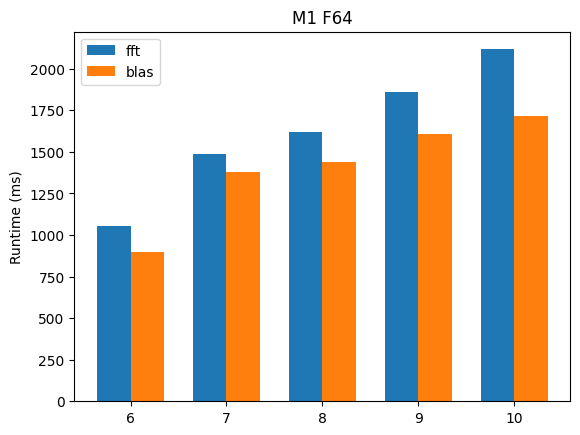

In [244]:
fig, ax = plt.subplots()

digits = np.array([6, 7, 8, 9, 10])

ax.set_title('M1 F64')
ax.set_ylabel('Runtime (ms)')

bar_width = 0.35  # width of bars

ax.bar(digits-bar_width/2, [df['runtime'] for df in best_fft_f64], bar_width, label='fft')
ax.bar(digits+bar_width/2, [df['runtime'] for df in best_blas_f64], bar_width, label='blas')

ax.legend()

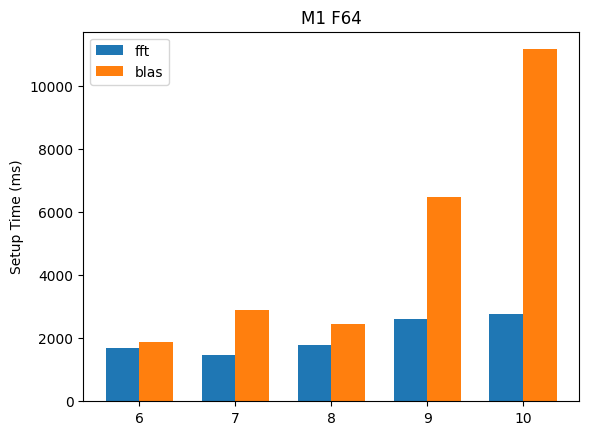

In [245]:
fig, ax = plt.subplots()

digits = np.array([6, 7, 8, 9, 10])

ax.set_title('M1 F64')
ax.set_ylabel('Setup Time (ms)')

bar_width = 0.35  # width of bars

ax.bar(digits-bar_width/2, [df['setup_time'] for df in best_fft_f64], bar_width, label='fft')
ax.bar(digits+bar_width/2, [df['setup_time'] for df in best_blas_f64], bar_width, label='blas')

ax.legend()